# Group 5 - Module 4: Diagnostic Systems

***
### Group Members:
* **Nils Dunlop, 20010127-2359, Applied Data Science, e-mail: gusdunlni@student.gu.se (16 hours)**
* **Francisco Erazo, 19930613-9214, Applied Data Science, e-mail: guserafr@student.gu.se (16 hours)**

#### **We hereby declare that we have both actively participated in solving every exercise. All solutions are entirely our own work, without having taken part of other solutions." (This is independent and additional to any declaration that you may encounter in the electronic submission system.)**

# Assignment 4
***

## Problem 1: Reading and Reflection
***
### Machine Learning Techniques to Diagnose Breast Cancer from Image-Processed Nuclear Features of Fine Needle Aspirates
- **Summary**:   
The paper introduces an interactive computer system that evaluates and diagnoses breast cancer using cytologic features derived from digital scans of fine-needle aspirates (FNAs) slides. This study involved a dataset of 569 patients (212 of which were diagnosed with breast cancer) to develop the system and tested it on a separate dataset of 54 patients (36 benign, 1 atypia and 17 malignant cases). It achieved a 97% accuracy throught 10-fold cross-validation and 100% accuracy on the test set. The system utilizes digital image analysis and machine learning techniques to enhance diagnostic accuracy for breast FNAs, indicating significant potential for early detection and treatment of breast cancer.

- **Key Takeaways**:
  - **Data**: They aspirated a small drop of viscous fluid from the breast massess and smeared it on a glass slide, and scanned it with a high-resolution digital camera. The digital images were then analyzed to extract 30 features for each case (radius, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension and texture).

  - **Digital Image Analysis**: One of the main benefits of this techonology is that provides measurements of shape features besides size and texture features provided by scanning techniques.

  - **MSM-Tree**: They implement MSM-Tree (MSM-T) to classify the observatinos between bening and malignant sets. Then this classifier was used to categorize new observations. They highlight that simpler classifiers outperformed more complex ones on new data. The best results were obtained with a single-plane classifier based on three nuclear features mean texture, the worst area and the worst smoothness.

  - **Clinical Applications**: The system estimates the probability of an instance being malignant, this information shared with the patient so they can make a decision about performing a biopsy or monitor an apparently benign mass.

  - **High Accuracy**: The system achieved a 97% predictive accuracy through 10-fold cross-validation estimating that the true prospective accuracy range between 95.5% and 98.5%. In the test set, the accuracy was 100%, indicating that the system is highly effective in diagnosing breast cancer. Important to remark they only used cell features.
  
  - **Advancement in Breast Cancer Detection**: The study represents an important advancement in the use of technology for breast cancer detection, indicating the potential of integrating AI and Machine Learning into the healthcare field. They also highlight that computer-assisted image analysis was better than human interpretation of the images.

### The Mythos of Model Interpretability
- **Summary**:     
The article discusses the complex nature of interpretability within machine learning models. It highlights the lack of a unified definition of interpretability encountered in the academic literature, the diverse motivations behind seeking interpretable models, and the distinction between model transparency (understanding how a model works) and post-hoc explanations (understanding hmodel prediction after they are made).

- **Key Takeaways**:    
  - **Need for Interpretability**: Interpretability is needed when there’s a gap between what supervised learning aims to do and the real-world consequences. Sometimes, just having predictions and metrics isn’t enough to understand the model.
    - **Trust**: Being able to interpret a model might be necessary for trust. Trust could mean believing that the model will do well in real situations. It could also mean being okay with letting the model take control.
    
    - **Causality**: Supervised learning models are often used hoping to learn about the natural world. But, the connections these models learn don’t always show cause and effect relationships.
    
    - **Transferability**: Humans are good at applying what they’ve learned to new situations. Machine learning models are also used in these situations, like when the environment changes or might be against them.
    
    - **Informativeness**: Sometimes, supervised models are used to give information to people making decisions. An interpretation can be useful even if it doesn’t explain how the model works.
    
    - **Fairness and Ethics**: Interpretations are needed to check if decisions made by algorithms are ethical. Usual evaluation metrics don’t guarantee that decisions made by machine learning will be acceptable, leading to demands for fairness and interpretable models.

  - **Transparency**: This refers to understanding how the model works. It can be viewed at different levels:

    - **Simulatability**: A model is considered transparent if a person can understand the entire model at once. This suggests that simpler models are more interpretable.

    - **Decomposability**: This means that each part of the model (input, parameter, calculation) can be explained intuitively.

    - **Algorithmic Transparency**: This applies to the learning algorithm itself. For example, in linear models, you can understand the shape of the error surface and prove that training will converge to a unique solution.

  - **Post hoc interpretability**: This approach extracts information from learned models after they have been trained. It doesn’t necessarily explain how a model works, but it can provide useful information. Some common approaches include:
    
    - **Text Explanations**: One model generates predictions, and a separate model generates an explanation.
    
    - **Visualization**: Visualizations are rendered to determine what a model has learned.
    
    - **Local Explanations**: These explain what a model depends on locally. For example, a saliency map highlights regions of the input that would most influence the output if changed.

    - **Explanation by Example**: This involves reporting which other examples are most similar with respect to the model.

  - **Linear vs Deep Models**: Linear models are not always more interpretable than deep neural networks. The level of interpretability depends on the specific definition used. For example, deep neural networks can have an advantage in post hoc interpretation because they learn rich representations that can be visualized or used for clustering.

  - **Claims about Interpretability**: Any claim about a model’s interpretability should be specific and meaningful. It should clearly define what form of interpretability is being referred to, such as transparency or post hoc interpretability. Also, the desire for transparency should not compromise the broader objectives of AI, such as improving healthcare.

  - **Potential Misleading of Post hoc Interpretations**: Post hoc interpretations can potentially mislead, especially when they are optimized to meet subjective demands. They might present plausible but misleading explanations. Therefore, it’s important to be cautious and avoid reproducing harmful behavior when using machine learning models.


## Problem 2: Implementation
***

In [1]:
# Read the data from the file wdbc.pkl
import pickle

filename = 'wdbc.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)

### Implement and Evaluate a Rule Based Classifier

To implement this classifier, we need to match the features mentioned in Eickhoff's paper with the features in the dataset.
- Cell Size Abnormal: We can use `radius` (as it relates to cell size), where larger values indicate larger cell size. We might consider    `radius_2` as an indicator of abnormal cell size.
- Cell Shape Abnormal: We can use `perimeter` or `concavity` features, as these indicate changes in cell shape and contour irregularities. `perimeter_2` or `concavity_2` could serve as indicators here.
- Cell Texture Abnormal: The texture feature is available in our dataset, with `texture_2` indicating abnormal texture.
- Cell Homogeneity Abnormal: We can use `smoothness` or `compactness` features, as these indicate variations in cell surface and density. `smoothness_2` or `compactness_2` could serve as indicators of abnormal homogeneity.

To define `abnormal` we can use the mean of the features as a threshold. If the value of the feature is above the mean, we can consider it as abnormal.

In [2]:
# Calculate mean "worst" values to set as initial thresholds
mean_values = data[['radius_2', 'perimeter_2', 'texture_2', 'smoothness_2', 'compactness_2', 'concavity_2']].mean()

mean_values

radius_2          16.269190
perimeter_2      107.261213
texture_2         25.677223
smoothness_2       0.132369
compactness_2      0.254265
concavity_2        0.272188
dtype: float64

Based on the `worst` values for each of the features, we can define the following thresholds for abnormality:
- Radius (Cell Size) Abnormal Threshold: 16.27  
- Perimeter (Cell Shape) Abnormal Threshold: 107.26  
- Texture (Cell Texture) Abnormal Threshold: 25.68  
- Smoothness (Cell Homogeneity) Abnormal Threshold: 0.132  
- Compactness (Cell Homogeneity) Abnormal Threshold: 0.254  
- Concavity (Cell Shape) Abnormal Threshold: 0.272  

The rule-based classifier will work as follows:  
- If the `worst` value of radius, perimeter, texture, smoothness, compactness, or concavity exceeds its respective threshold, the diagnosis is considered malignant.  
- If none of the features exceed the threshold, the diagnosis is considered benign.  

In [3]:
# Implementing the rule-based classifier
def rule_based_classifier(row):
    # Define thresholds
    thresholds = {
        'radius_2': 16.27,
        'perimeter_2': 107.26,
        'texture_2': 25.68,
        'smoothness_2': 0.132,
        'compactness_2': 0.254,
        'concavity_2': 0.272
    }

    # Apply rules
    if (row['radius_2'] > thresholds['radius_2'] or
        row['perimeter_2'] > thresholds['perimeter_2'] or
        row['texture_2'] > thresholds['texture_2'] or
        row['smoothness_2'] > thresholds['smoothness_2'] or
        row['compactness_2'] > thresholds['compactness_2'] or
        row['concavity_2'] > thresholds['concavity_2']):
        return 1  # Malignant
    else:
        return 0  # Benign

# Apply the classifier to each row in the dataset
data['rule_based_diagnosis'] = data.apply(rule_based_classifier, axis=1)

### Prepare the Data for the Other Models

In [4]:
from sklearn.model_selection import train_test_split

# Prepare the data
X = data.drop(['id', 'malignant', 'rule_based_diagnosis'], axis=1)
y = data['malignant']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implement and Evaluate Random Forest Classifier

In [5]:
# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

### Implement and Evaluate a Classifier of your Choice (Naive Bayes) which attempts to Trade Off Interpretability and Classification Performance

In [6]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

### Evaluate the Performance of the Classifiers

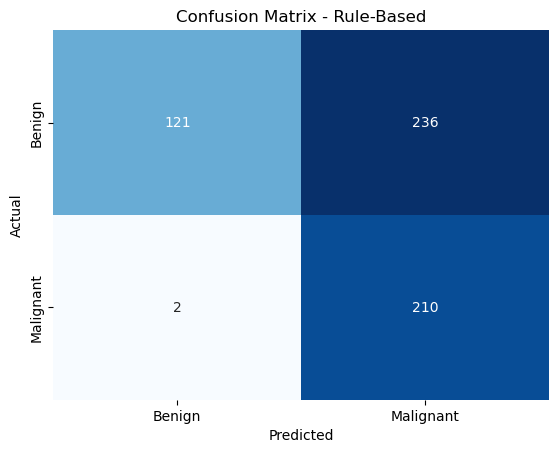

In [7]:
# Confusion matrix Rule-based classifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(title, cm):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cbar=False)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

rb_cm = confusion_matrix(data['malignant'], data['rule_based_diagnosis']) # CM considers all observations

plot_confusion_matrix("Confusion Matrix - Rule-Based", rb_cm)

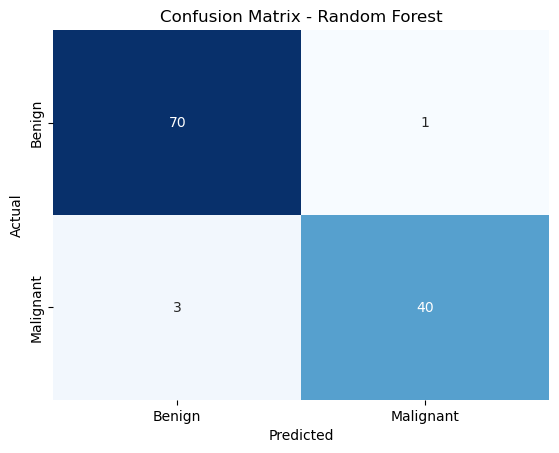

In [8]:
# Confusion matrix Random Forest Classifier
rf_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix("Confusion Matrix - Random Forest", rf_cm)

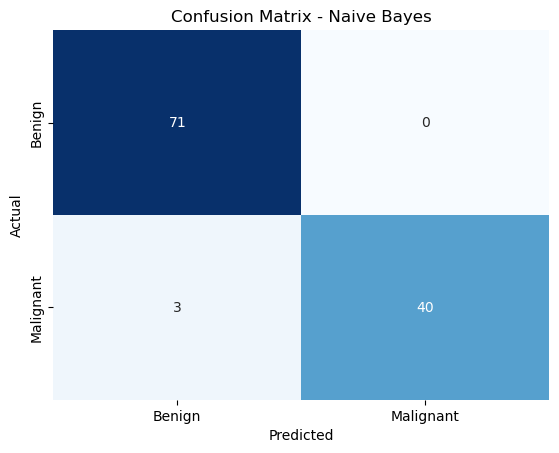

In [9]:
# Confusion matrix Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb)

plot_confusion_matrix("Confusion Matrix - Naive Bayes", nb_cm)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the rule-based classifier
rb_accuracy = accuracy_score(data['malignant'], data['rule_based_diagnosis'])
rb_precision = precision_score(data['malignant'], data['rule_based_diagnosis'])
rb_recall = recall_score(data['malignant'], data['rule_based_diagnosis'])
rb_f1_score = f1_score(data['malignant'], data['rule_based_diagnosis'])

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)

# Evaluate Naive Bayes Classifier
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1_score = f1_score(y_test, y_pred_nb)

# Print the evaluation results
print("Rule-based Classifier:")
print("Accuracy:", rb_accuracy)
print("Precision:", rb_precision)
print("Recall:", rb_recall)
print("F1-score:", rb_f1_score)
print()
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1_score)
print()
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1_score)


Rule-based Classifier:
Accuracy: 0.5817223198594025
Precision: 0.47085201793721976
Recall: 0.9905660377358491
F1-score: 0.6382978723404256

Random Forest Classifier:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809524

Naive Bayes Classifier:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1-score: 0.963855421686747


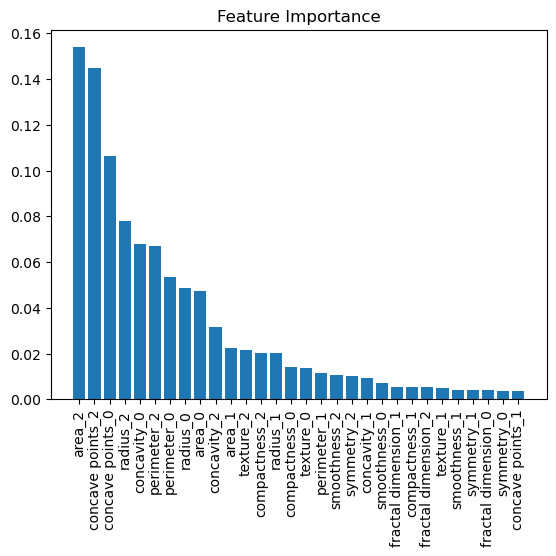

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_classifier.feature_importances_

# Sort the feature importance in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so they match the sorted feature importance
names = [X.columns[i] for i in indices]

# Create the plot
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

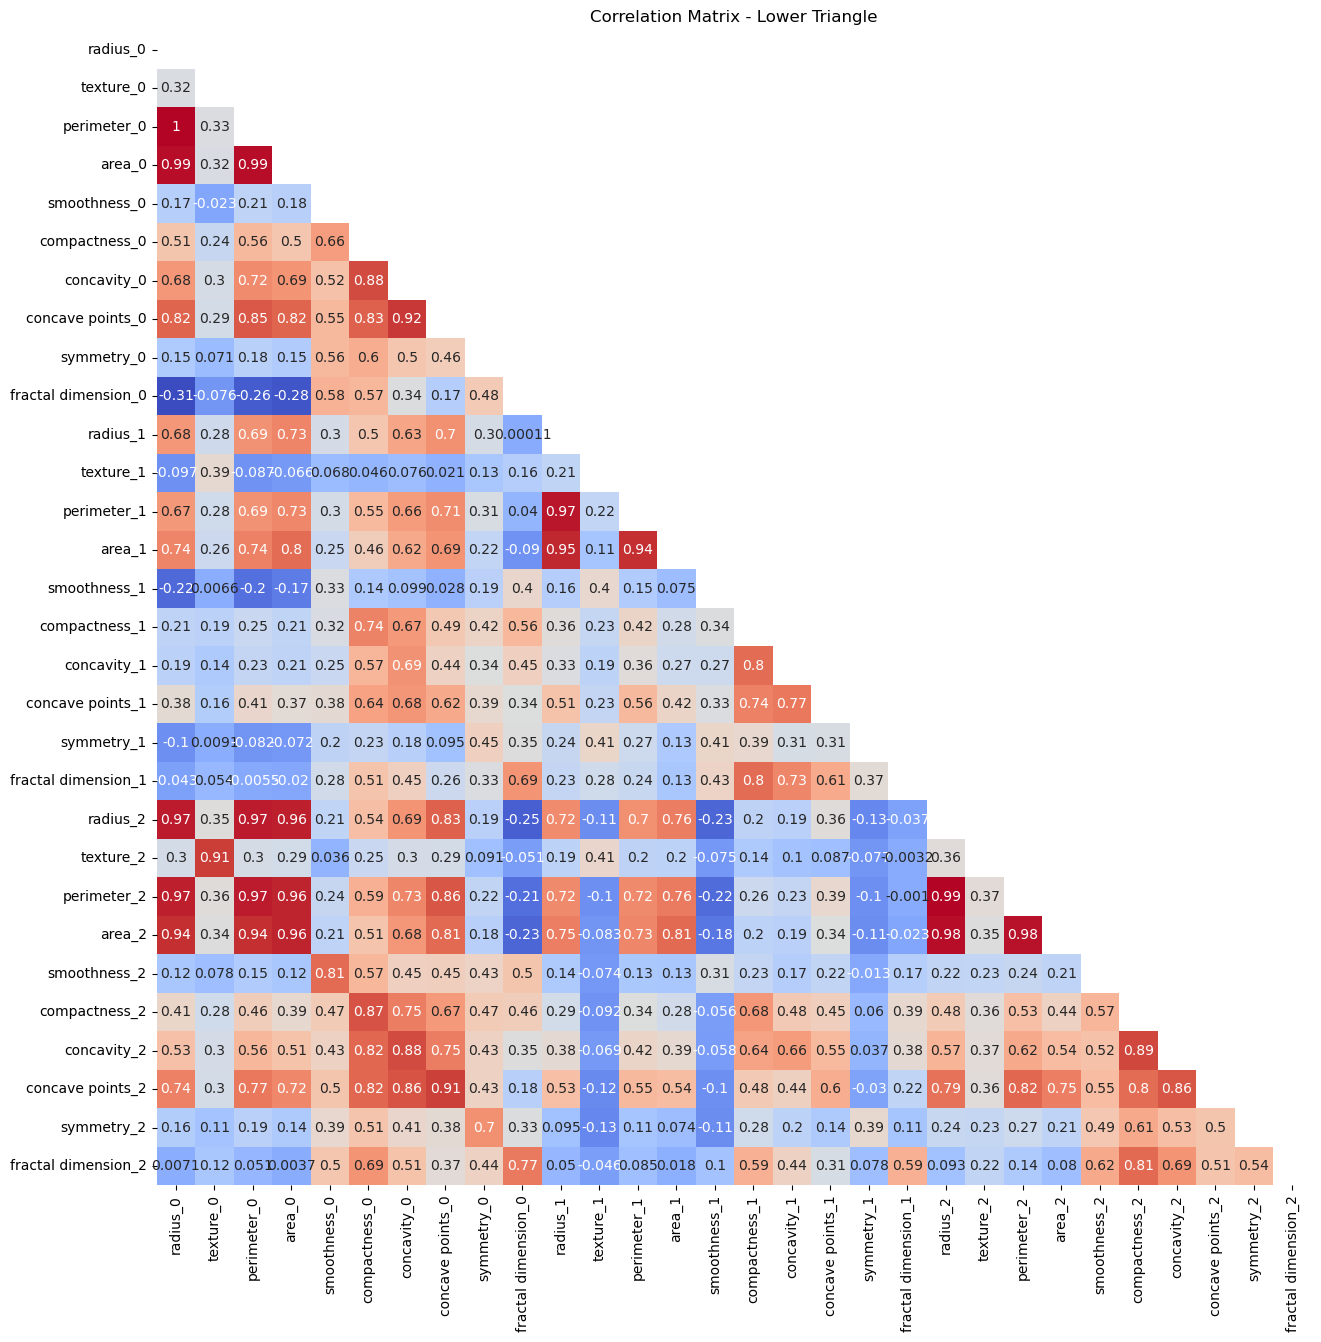

In [12]:
# Correlation matrix
correlation_matrix = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with the mask
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", cbar=False, square=True)
plt.title("Correlation Matrix - Lower Triangle")
plt.show()


### Summary Metrics, Interpretability and Features
| Metric    | Rule-based Classifier* | Random Forest Classifier | Naive Bayes Classifier |
|-----------|-----------------------|--------------------------|------------------------|
| Accuracy  | 0.5817                | 0.9649                   | 0.9737                 |
| Precision | 0.4709                | 0.9756                   | 1.0000                 |
| Recall    | 0.9906                | 0.9302                   | 0.9302                 |
| F1-score  | 0.6383                | 0.9524                   | 0.9639                 |

`* These metrics consider the entire dataset, not just the test set.`

**Evaluation Performance**:
We have included the confusion matrix and several other metrics to compare the classification performance of these three classifiers. Regarding accuracy, the model that provides the best performance is the Naive Bayes Classifier, followed by the Random Forest Classifier and the Rule-based Classifier. However, in the context of breast cancer diagnosis, we need to understand the trade-offs between false positives and false negatives.  
- False Positive (Type I Error): In breast cancer diagnosis, a false positive means that the test incorrectly indicates that a patient has breast cancer. This can provoke unncessary anxiety, stress, and medical procedures. However, a false positive does not have a direct impact on the patient's chance of survival since the patient does not have cancer.  
- False Negative (Type II Error): A false negative means that the test incorrectly indicates that breast cancer is not present when it actually is. This scenario is more dangerous than a false positive because it can lead to dealys in treatment for a potentially aggresive disease, resulting in reduced chances of survival.   

For this reason, minimizing the false negatives is prioritized to ensure that as many true cases as possible are identified and treated in advanced. However, it's also important to balance false positives to avoid unnecessary stress and medical procedures. In this context, we could say that our main metric should be recall, because it measures how many of the actual positive cancer cases were captured by the model. In this sense, Rule-based Classifier has the highest recall and could be considered the best model, but it has the lowest precision, meaning that it has a high number of false positives (people who don't have cancer but are diagnosed with it). So, the model that provides the best balance is the Naive Bayes Classifier with a F1-score of 0.9639, because minimizes the false negatives without excessively increasing the false positives.

**Interpretability**:
- The Rule-Based system could be the most interpretable if the rules are simple and based on clear medical criteria. However, its performance suggests that the rules may not be well-aligned with the underlying patterns in the data, leading to a high rate of false positives.  
- The Random Forest model is less interpretable due to the ensemble nature of the method, where multiple decision trees contribute to the final outcome.
- The Naive Bayes model is more interpretable than the Random Forest model, as it is provides probabilistic results that can sometimes offer insights into the likelihood of a case being benign or malignant, it is based on conditional independence assumptions. However, it is less interpretable than the Rule-Based model, as it does not provide clear rules for classification.

**Feature Interaction**:    

Considering the Feature Importance plot, we can see that certain features are highly important, indicating that they have significant impact on the model predictions. Being `area_2`, `concave points_2`, `concave points_0`, `radius_2` and `concavity_0` the most important features. 

On the other hand, analyzing the correlation matrix we can see that there are some features that are highly correlated, which could be a problem for the Naive Bayes model, as it assumes that the features are independent. However, the Random Forest model is robust to correlated features, as it selects a random subset of features to split on at each node, which can help to decorrelate the features. The features with high absolute correlation, which suggest potential interactions are:

- Features related to size (`radius`, `perimeter`, `area`) tend to have very high positive correlations with one another. This is expected because these measurements are directly related to the physical dimensions of the objects being measured (for example, tumors in medical imaging). Specifically, `radius_0` has a correlation of `0.997855` with `perimeter_0` and `0.987357` with `area_0`, which is very close to `1`, indicating a strong positive relationship.
  
- There is also a strong positive correlation between features that describe the shape and complexity of the objects (`compactness`, `concavity`, `concave points`). For example, `compactness_0` has a correlation of `0.883121` with `concavity_0` and `0.831135` with `concave points_0`.

- High correlations within these groups (like `radius_0` with `radius_1` and `radius_2`) could indicate consistency across these measurements.

- High correlations between `smoothness`, `compactness`, `concavity`, and `concave points` across different measurement types suggest that when one of these characteristics changes, the others tend to change in a similar way, regardless of the measurement type.

- There are also some negative correlations present, such as `radius_0` with `fractal dimension_0`, indicating that as the size increases, the complexity of the texture (as captured by the fractal dimension) tends to decrease.


## Problem 3: Discussion
***

In healthcare, interpretability is crucial because decisions made by models can directly impact patient care. For example, a model might be used to predict whether a patient has a certain disease based on their symptoms. If the model is interpretable, a doctor can understand why the model made its prediction and use this information to inform their treatment plan.

Interpretability could be defined as the space that exists between complete transparency and non-transparency. Mathematically speaking, we would find a model completely interpretable is we could fully understand the underlying function $f$ that maps the input $\mathbf{x}$ to the output $\mathbf{y}$. 

$$
\mathbf{y} = f(\mathbf{x})
$$

For example, a linear regression model: 
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n
$$

where $\beta_0$ is the intercept, $\beta_1$, $\ldots$, $\beta_n$ are the coefficients for each feature $x_1$, $\ldots$, $x_n$, and $y$ is the target variable. Each coefficient quantifies the effect of each feature on the target variable, and the model’s predictions are completely interpretable due to the direct correspondence between feature values and the output.

The potential benefits of interpretability in healthcare include:
- **Trust**: Doctors and patients are more likely to trust and adopt models that they can understand. Trust is essential for models to be integrated into healthcare decision-making processes of diagnosis and treatment.
- **Fairness and Ethics**: Interpretability is critical to ensure that automated decisions in healthcare are made fairly, without bias, and ethically justifiable. It allows for the detection and correction of biases that may be present in the training data or model decisions.
- **Causality**: By understand interpretability healthcare experts can tell the difference between casual relationships and correlative patterns identified by models. Interpretability can help suggest hypotheses about causal links, though these must be validated through clinical trials or further study.
- **Transference**: The ability of a model to adapt to new conditions—like different patient demographics—is vital. Interpretability supports this by revealing whether the model's reasoning is based on features that are likely to generalize across settings. It also makes easier for other researhers to replicate and improve the model.
- **Informativeness**: Interpretability enhances the informativeness of a model by providing actionable insights. In healthcare, where decisions can be complex, interpretability helps by clarifiying the 'why' behind a model's recommendations. Futhermore, it can help with the right to explanation, which is a legal requirement as per the GDPR.

Drawbacks of interpretability in healthcare include:
- **Complexity**: Often, more complex models which are less interpretable, perform better in terms of accuracy, recall or any other metric in consideration. There is a trade-off between interpretability and performance.
- **Misinterpretation**: Interpretability can lead to misinterpretation of the model's reasoning. This can be dangerous in healthcare, as it can lead to incorrect treatment decisions.
- **Simplification**: In the pursuit of interpretability, one may oversimplify the model, which can lead to poorer performance. This is especially true for complex medical conditions that may have multiple interacting factors. 
- **High Cost**: Building interpretable models can be more expensive and time-consuming than building black-box models. This is because interpretable models often require more manual feature engineering and model tuning. This could affect the limited resources of healthcare institutions.

## References
***
- Wolberg, W.H., Street, W.Nick. and O.L. Mangasarian (1994). Machine learning techniques to diagnose breast cancer from image-processed nuclear features of fine needle aspirates. Cancer Letters, [online] 77(2-3), pp.163–171. doi:https://doi.org/10.1016/0304-3835(94)90099-x.

- Lipton, Z. (2016). The Mythos of Model Interpretability. [online] Available at: https://arxiv.org/abs/1606.03490 [Accessed 6 Feb. 2024].

- Eickhoff, J., Soyer, H.P., Argenziano, G., Zalaudek, I., Kerl, H., and Abmayr, W. (1999). Machine Learning Techniques to Diagnose Breast Cancer from Image-Processed Nuclear Features of Fine Needle Aspirates. Investigative Radiology, 34(11), 699-705. [online] Available at: https://journals.lww.com/investigativeradiology/Abstract/1999/11000/Machine_Learning_Techniques_to_Diagnose_Breast.1.aspx [Accessed 6 Feb. 2024].

- Uci.edu. (2019). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic [Accessed 6 Feb. 2024].

- Carsten Eickhoff. 2014. Crowd-powered experts: helping surgeons interpret breast cancer images. In Proceedings of the First International Workshop on Gamification for Information Retrieval (GamifIR '14). Association for Computing Machinery, New York, NY, USA, 53–56. https://doi.org/10.1145/2594776.2594788

- Molnar, C. (2023). Chapter 3 Interpretability | Interpretable Machine Learning. [online] Github.io. Available at: https://christophm.github.io/interpretable-ml-book/interpretability.html [Accessed 6 Feb. 2024].

- Bazila Banu A and Ponniah Thirumalaikolundusubramanian (2018). Comparison of Bayes Classifiers for Breast Cancer Classification. PubMed, [online] 19(10), pp.2917–2920. doi:https://doi.org/10.22034/apjcp.2018.19.10.2917.

- M. Vijay Anand, B. KiranBala, Srividhya, S.R., Kavitha C, Younus, M. and Rahman, H. (2022). Gaussian Naïve Bayes Algorithm: A Reliable Technique Involved in the Assortment of the Segregation in Cancer. Mobile Information Systems, [online] 2022, pp.1–7. doi:https://doi.org/10.1155/2022/2436946.

- Huang, A. (2020). 6 - Interpretability. [online] Machine Learning Blog | ML@CMU | Carnegie Mellon University. Available at: https://blog.ml.cmu.edu/2020/08/31/6-interpretability/ [Accessed 6 Feb. 2024].

- Wavestone. (2019). Interpretability of machine learning: what are the challenges in the area of automated decision-making processes? - Wavestone. [online] Available at: https://www.wavestone.com/en/insight/interpretability-machine-learning/ [Accessed 6 Feb. 2024].

‌

## Self Check
***
- Have you answered all questions to the best of your ability?
Yes, we have.
- Is all the required information on the front page, is the file name correct etc.?
Indeed, all the required information on the front page has been included.
- Anything else you can easily check? (details, terminology, arguments, clearly stated answers etc.?)
We have checked, and everything looks good.